In [7]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
df_ipl=pd.read_csv('matches.csv')# loading the dataset
df_ipl.head()#the first five records of dataset

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [9]:
df_ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [10]:
#looking at the number of rows and columns in the dataset
df_ipl.shape

(756, 18)

In [11]:
#lets write a function to find the matches won by teams
def wins(DataFrame):
    teamnames= set(DataFrame['team1'])
    teamlist= []
    winlist= []
    
    for mem in teamnames:
        teamlist.append(mem)
        winlist.append(len(DataFrame[DataFrame['winner']==mem]))
        
#plot the matches won by teams
    plt.figure(figsize=(10,5))
    plt.bar(teamlist,winlist)
    plt.xlabels('Team names')
    plt.ylabels('No: of Wins')
    plt.title('No: of matches won by teams in seasons 2008 to 2019')
    plt.grid('True')
    plt.xticks(rotation = 'vertical')
    plt.show()
    

AttributeError: module 'matplotlib.pyplot' has no attribute 'xlabels'

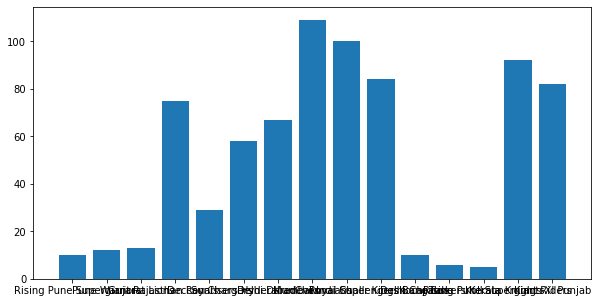

In [6]:
wins(df_ipl)

In [ ]:
#getting the frequency of the most man of the matches
df_ipl['player_of_match'].value_counts()

In [ ]:
#getting top 10 players with most man of the match
df_ipl['player_of_match'].value_counts()[0:10]

In [ ]:
ipl_list=list(df_ipl['player_of_match'].value_counts()[0:10].keys())

In [ ]:
#making bar plot with most top 10 man of the match award
plt.figure(figsize=(15,5))
plt.bar(ipl_list,df_ipl['player_of_match'].value_counts()[0:10])
plt.show()

In [ ]:
#Getting frequency of result column
df_ipl['result'].value_counts()

In [ ]:
#finding out most number of toss winner w.r.t team
df_ipl['toss_winner'].value_counts()

*Trend of winning team for the first batting?*

In [ ]:
#Extracting the records where a team won batting first
batting_first=df_ipl[df_ipl['win_by_runs']!=0]
batting_first.head()

In [ ]:
#distribution of the records where a team won batting first
#making a histogram
plt.figure(figsize=(10,5))
plt.hist(batting_first['win_by_runs'])
plt.title('Distribution of runs')
plt.xlabel('Runs')
plt.show()

In [ ]:
#finding out the number of wins w.r.t each team after batting first
batting_first['winner'].value_counts()

In [ ]:
#making a bar plot for top 3 teams after batting first
top3_batting_first=batting_first['winner'].value_counts()[0:3].keys()
plt.figure(figsize=(7,5))
plt.bar(top3_batting_first,batting_first['winner'].value_counts()[0:3],color=('b','r','y'))
plt.show()

In [ ]:
#what is the percentage of each team win after batting first
plt.figure(figsize=(7,7))
plt.pie(list(batting_first['winner'].value_counts()),labels=list(batting_first['winner'].value_counts().keys()),autopct='%0.1f%%')
plt.show()

---

*What is Trend of teams wins after batting second?*

In [ ]:
#Extracting those records who won the team after batting second
batting_second=df_ipl[df_ipl['win_by_wickets']!=0]
batting_second.head()#looking at the data

In [ ]:
#looking a histogram for frequency of wins w.r.t number of wickets
plt.figure(figsize=(7,5))
plt.hist(batting_second['win_by_wickets'],bins=30)
plt.title('Distribution of wickets by win teams ')
plt.ylabel('num of win matches')
plt.xlabel('wickets')
plt.show()

In [ ]:
#finding out the frequency of number of wins w.r.t each team after batting second
batting_second['winner'].value_counts()

In [ ]:
#making a bar plot for top 3 teams after batting second
top3_batting_second=batting_second['winner'].value_counts()[0:3].keys()
plt.figure(figsize=(7,5))
plt.bar(top3_batting_second,batting_second['winner'].value_counts()[0:3],color=('purple','red','orange'))
plt.show()

In [ ]:
#what is the percentage of each team win after batting second
plt.figure(figsize=(7,7))
plt.pie(list(batting_second['winner'].value_counts()),labels=list(batting_second['winner'].value_counts().keys()),autopct='%0.1f%%')
plt.show()

In [ ]:
#number of matches played each season
df_ipl['Season'].value_counts()

In [ ]:
#Finding out how many times a team has won the match after winning the toss
import numpy as np
np.sum(df_ipl['toss_winner']==df_ipl['winner'])

In [ ]:

df_ipl.groupby('Season')['win_by_wickets']=='2013'.value_counts().sum()

In [ ]:
df_ipl.groupby('Season')['win_by_runs'].value_counts().sum()

In [ ]:
df_deliveries=pd.read_csv('deliveries.csv')
df_deliveries.head()

In [ ]:
df_deliveries.shape

In [ ]:
df_deliveries.columns

In [ ]:
df_ipl.describe()

In [ ]:
df_ipl.hist();

In [ ]:
sns.heatmap(df_ipl.corr(),annot=True,fmt='.2f');

In [ ]:
df_deliveries['match_id'].unique()

In [ ]:
df_deliveries[df_deliveries['match_id']==1].head()